## Introduksjon...

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import os
import time
import cv2

### NMF

In [2]:
def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    Decompose matrix V in matrices W and H, with d as the number of columns in W and rows in H.
    For each iteration of W and H the frobenius norm between and the matrix product W @ H is calculated,
    and passed into array for_norm.
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
        fro_norm: (maxiter) array
    """

    if seed != 0:
        np.random.seed(seed)

    # Initialize W and H as matrices with random numbers between 0 and 1
    m , n = V.shape
    W = np.random.random(size = (m, d))
    H = np.random.random(size = (d, n))
    
    # Scale initial values
    W = W * np.sqrt(V.mean()/d)
    H = H * np.sqrt(V.mean()/d)

    fro_norm = np.zeros(maxiter)

    # Update W and H
    for i in range(maxiter):
        H = H * (W.T @ V) / (W.T @ W @ H + delta)
        W = W * (V @ H.T) / (W @ H @ H.T + delta)
        fro_norm[i] = np.linalg.norm(V - W@H, ord='fro')

    return W, H, fro_norm

# Task 1

### Matrices

Starts with defining the matrices as defined in the assignment text

In [3]:
A_1 = np.array([[1,0],
                [0,1]])

A_2 = np.array([[1,2],
                [1,1],
                [1,2]])

A_3 = np.array([[2,1,1],
                [2,1,1],
                [1,1,2]])

A_4 = np.array([[2,1,0],
                [1,2,3],
                [0,3,3]])

### 1a)

Assume that all elements in A are non-negative, and that all elements in $H_k$ and $W_k$ > 0. Initialize $(H_0)_{ij} > 0$ and $(W_0)_{ij} > 0$. First iteration is therefore:
$$
(H_1)_{ij} = (H_0)_{ij} * \frac{(W_0^T A)_{ij}}{(W_0^T W_0 H_0)_{ij}}
$$
Since all (ij) elements needs to be bigger than 0 by assumption, multiplicatiting and dividing by elements bigger than 0  $\Rightarrow (H_1)_{ij} > 0$
For $(W_0)_{ij}$:
$$
(W_1)_{ij} = (W_0)_{ij} * \frac{(A H_1^T)_{ij}}{(W_0 H_1 H_1^T)_{ij}}
$$
Again multiplying and dividing by elements bigger than zero $\Rightarrow (H_=)_{ij} > 0$.
Now we assume $(H_k)_{ij} > 0, (W_k)_{ij} > 0$. For iteration of the next matrices $(W_{k+1})_{ij} > 0, (W_{k+1}))_{ij} > 0$ we get:
$$
(H_{k+1})_{ij} = (H_k)_{ij} * \frac{(W_k^T A)_{ij}}{(W_k^T W_k H_k)_{ij}}
$$
and
$$
(W_{k+1})_{ij} = (W_k)_{ij} * \frac{(A H_{k+1}^T)_{ij}}{(W_k H_{k+1} H_{k+1}^T)_{ij}}
$$
such that we only multiply and divide with positive elements. Since the first iteration gives non negative elements of the matrices, and the "next" iteration gives the same. By induction it is therefore proved that all iterations $W_k$ and $H_k$ ar non- negative

### 1b)

$\frac{W^T A}{W^T W H}$ matrix of ones $\Rightarrow (\frac{W^T A}{W^T W H})_{ij} = 1$. $(H_{k+1})_{ij} = (H_k)_{ij} * \frac{(W_k^T A)_{ij}}{(W_k^T W_k H_k)_{ij}} = (H_k)_{ij} * 1 = (H_k)_{ij}$. Therefore $H_{k+1} = H_{k}$.

Now we set $H_{k+1} = H_k = H$.
$$
W H = A \Rightarrow W_k H_k = A \Rightarrow W_k^T W_k H_k = W_k^T A 
$$
Calculating elementwise with indices (i,j):
$$
\Rightarrow (H_{k+1})_{ij} * (W_k^T W_k H_k)_{ij}= (H_{k+1})_{ij} * (W^T A)_{ij} $$
$$
\Rightarrow (H_{k+1})_{ij} = (H_{k+1})_{ij} * \frac{(W^T A)_{ij}}{(W_k^T W_k H_k)_{ij}} = (H_{k})_{ij} * \frac{(W^T A)_{ij}}{(W_k^T W_k H_k)_{ij}} = (H_{k})_{ij}
$$

Therefore $W H = A$ $ \Rightarrow H_{k+1} = H_k$

### 1c)

If $H_0$ and $W_0$ both have conatin only zero elements, then all iterates $H_k$ and $W_k$ will conatin only zeroes as well, since their elements $(H_k)_{ij}$ and $(W_k)_{ij}$ will be a multiplication between some number and zero. So if $H_0$ and $W_0$ are initialized with only zero elements, the iteration will not produce anything interesting.


### 1e)

In [4]:
W1, H1, norm1 = NMF(A_1,2,maxiter=1000)
W2, H2, norm2 = NMF(A_2,2,maxiter=1000)

print(f"Frobenius norm of the difference A1-WH: {np.linalg.norm(A_1-W1@H1):.3e}")
print(f"Frobenius norm of the difference A2-WH: {np.linalg.norm(A_2-W2@H2):.3e}")

Frobenius norm of the difference A1-WH: 5.686e-10
Frobenius norm of the difference A2-WH: 8.168e-10


**Comment:** As we can see, the norm is practically zero after $1000$ iterations with orders less than $10^{-8}$. The results appear reasonable given that the two matrices are small and simple.

### 1f)

In [5]:
eig_3 = np.linalg.eig(A_3)
eig_4 = np.linalg.eig(A_4)
print('The eigenvalues of A3 are: ', eig_3[0], 'The eigenvalues of A3 are: ', eig_4[0])

The eigenvalues of A3 are:  [ 4.00000000e+00  1.00000000e+00 -5.06378553e-16] The eigenvalues of A3 are:  [-0.75770177  2.09911499  5.65858678]


Comment: The last eigenvalue of matrix $A_3$ is near machine accuracy of 0, so we assume it to be zero. Therefore the matrix $A_3$ has rank 2, whereas matrix $A_4$ has rank 3

### 1g)

[]

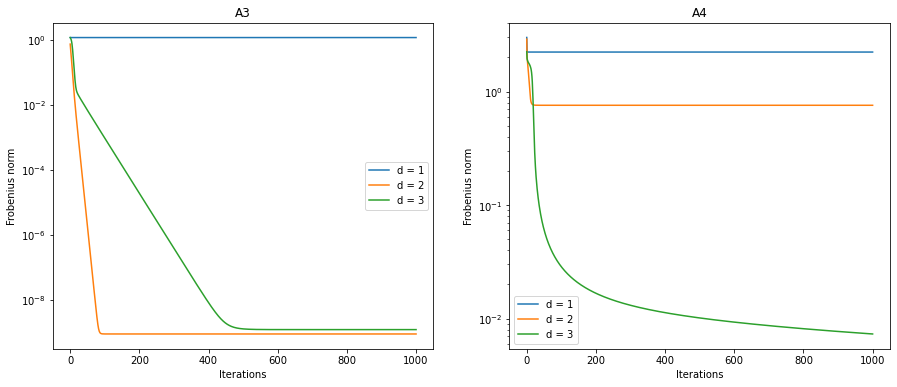

In [6]:
d_list = [1,2,3]
maxiter = 1000
norm_A3 = np.zeros((3, maxiter))
norm_A4 = np.zeros((3, maxiter))
iter = np.linspace(0, maxiter, maxiter)

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15, 6))
for i in range(len(d_list)):
    d = d_list[i]
    W_3, H_3, norm_A3[i] = NMF(A_3, d, maxiter=maxiter)
    W_4, H_4, norm_A4[i] = NMF(A_4, d, maxiter=maxiter)
    ax1.semilogy(iter, norm_A3[i], label = f"d = {d}")
    ax2.semilogy(iter, norm_A4[i], label = f"d = {d}")
ax1.legend()
ax1.set_title('A3')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Frobenius norm')
ax2.legend()
ax2.set_title('A4')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Frobenius norm')
plt.plot()

Comment: It is clear that the error tends to decrease with increasing $d$, until the alorithm reaches a local/global minima to where it stays constant. Interestingly, for matrix $A_3$ the convergence(?) is faster for $d=2$ than $d=3$. This is because, as we saw from $1f)$ that $A_3$ only has two eigenvalues meaning that a decomposition into two coloumns and rows for $W$ and $H$ respectively is the optimal choice for this matrix. A larger value of d only results in reduntant information for the NMF to process.

# Task 2

In [7]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

# Number of faces to keep in final array
N = 500

# Load all 10000 images
faces = load_images(10000)

# Select N random images
choices = np.random.choice(faces.shape[-1],N, replace = False)
faces = faces[:,:,:,choices]

# Check that the shape is correct
print(faces.shape)


(24, 24, 4, 500)


In [8]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams


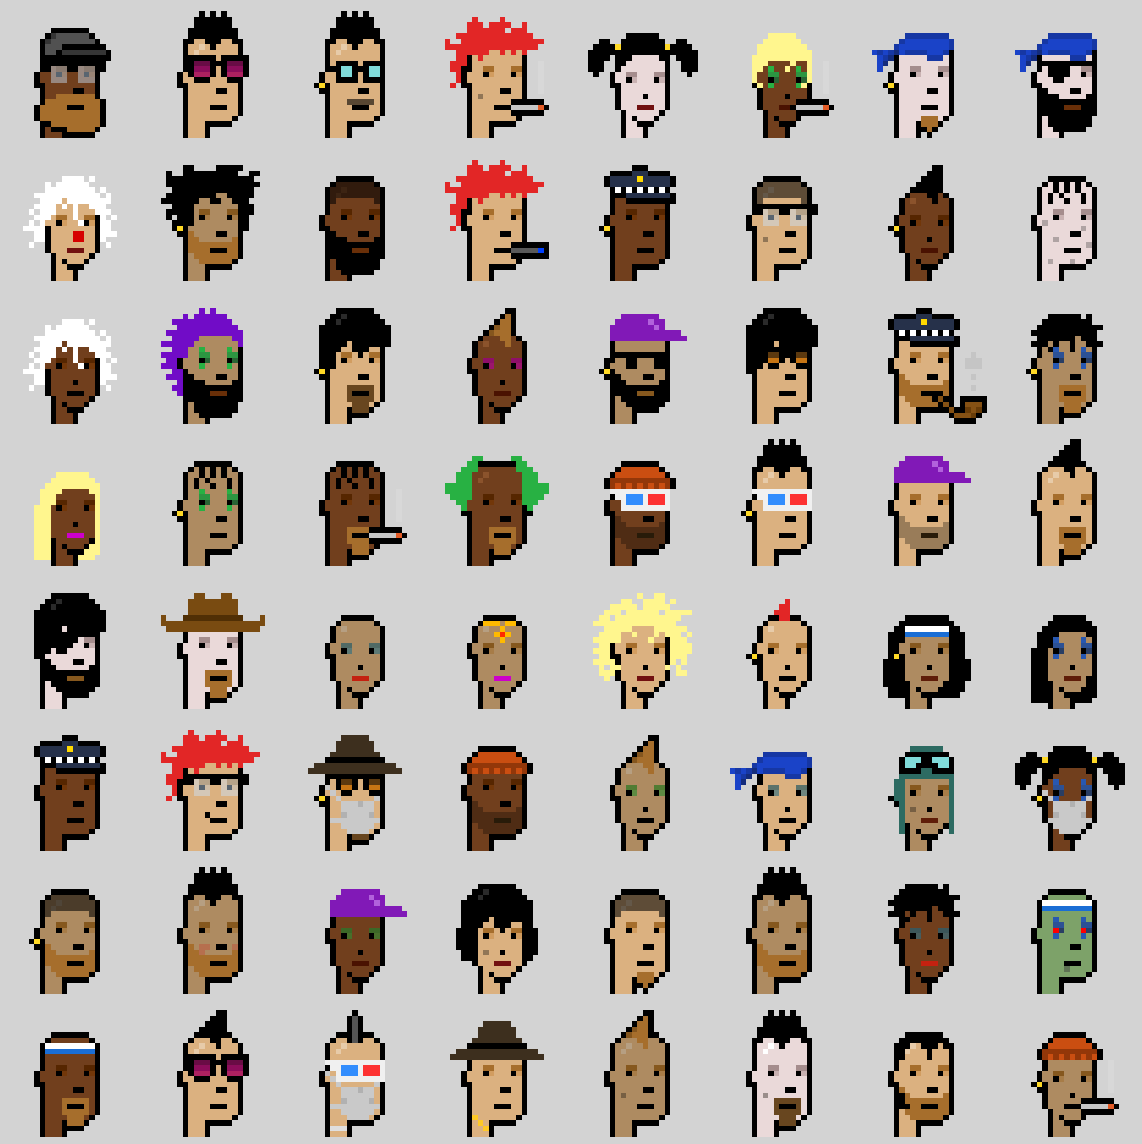

In [9]:
# Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
plotimgs(faces, 8, filename="punks.png")

In [10]:
# Split the images into opacity and rgb channels
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape

# Clever reshape "trick". This is the matrix we will apply the NMF to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)

### 2b)

[20. 20. 20. 21.]


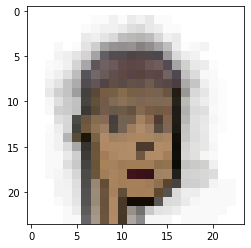

In [11]:
mean_f=np.mean(faces[:,:,:,:],axis=-1)
plt.imshow(mean_f[:,:,:])
ranks=np.zeros(4)
for i in range(4):
    ranks[i]=np.linalg.matrix_rank(mean_f[:,:,i])
print(ranks)

Comment: ...

### 2c)

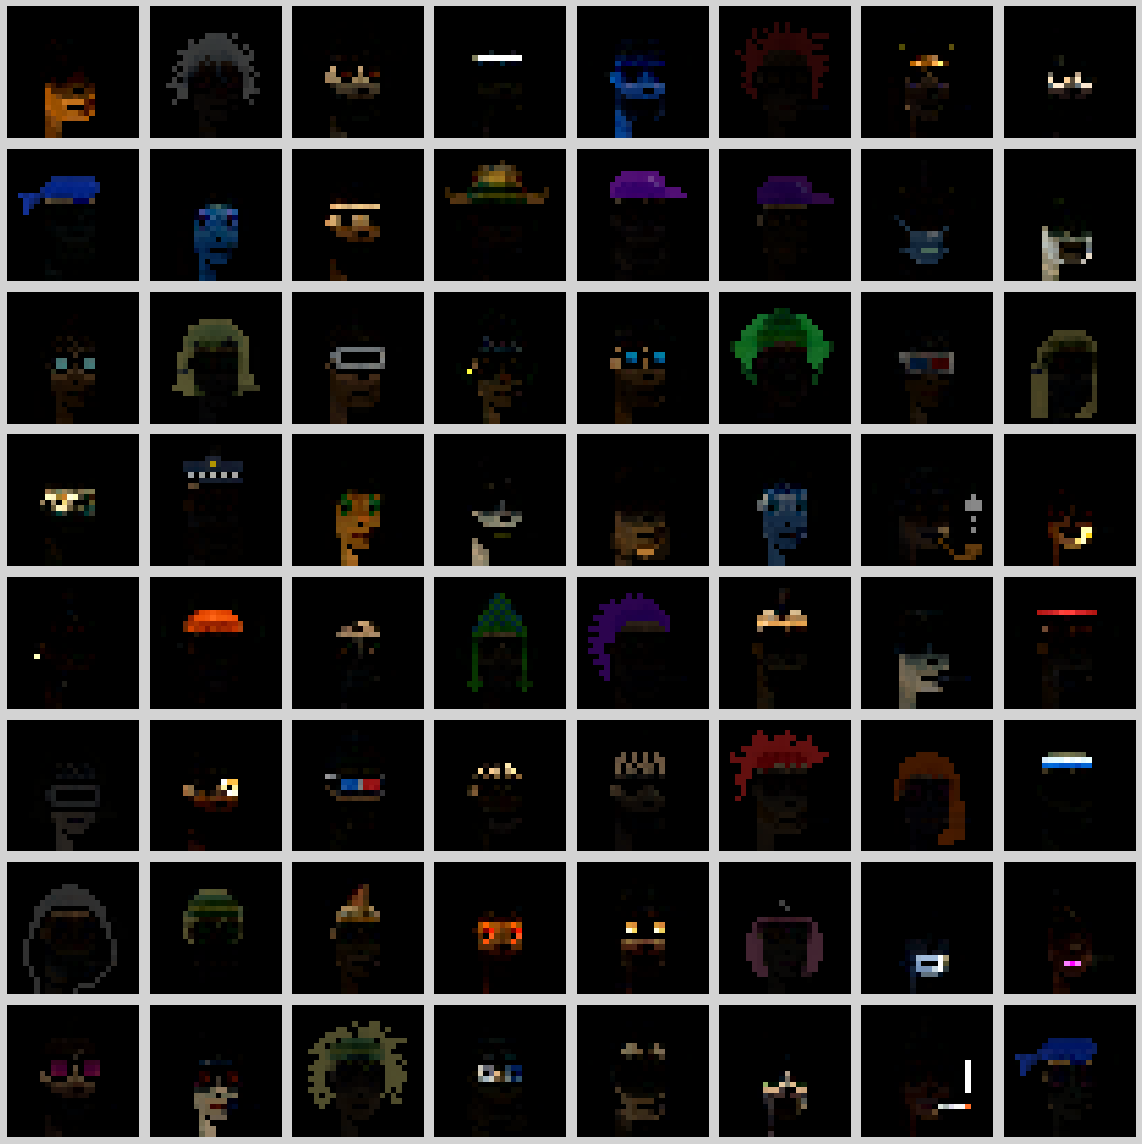

In [12]:
W_RGB, H_RGB, norm_fro_RGB = NMF(faces_reshaped, d=64)
W_reshaped = np.clip(np.reshape(W_RGB, (24,24,3,64)), 0, 1)
plotimgs(W_reshaped, 8)

Comment: ...

### 2d)

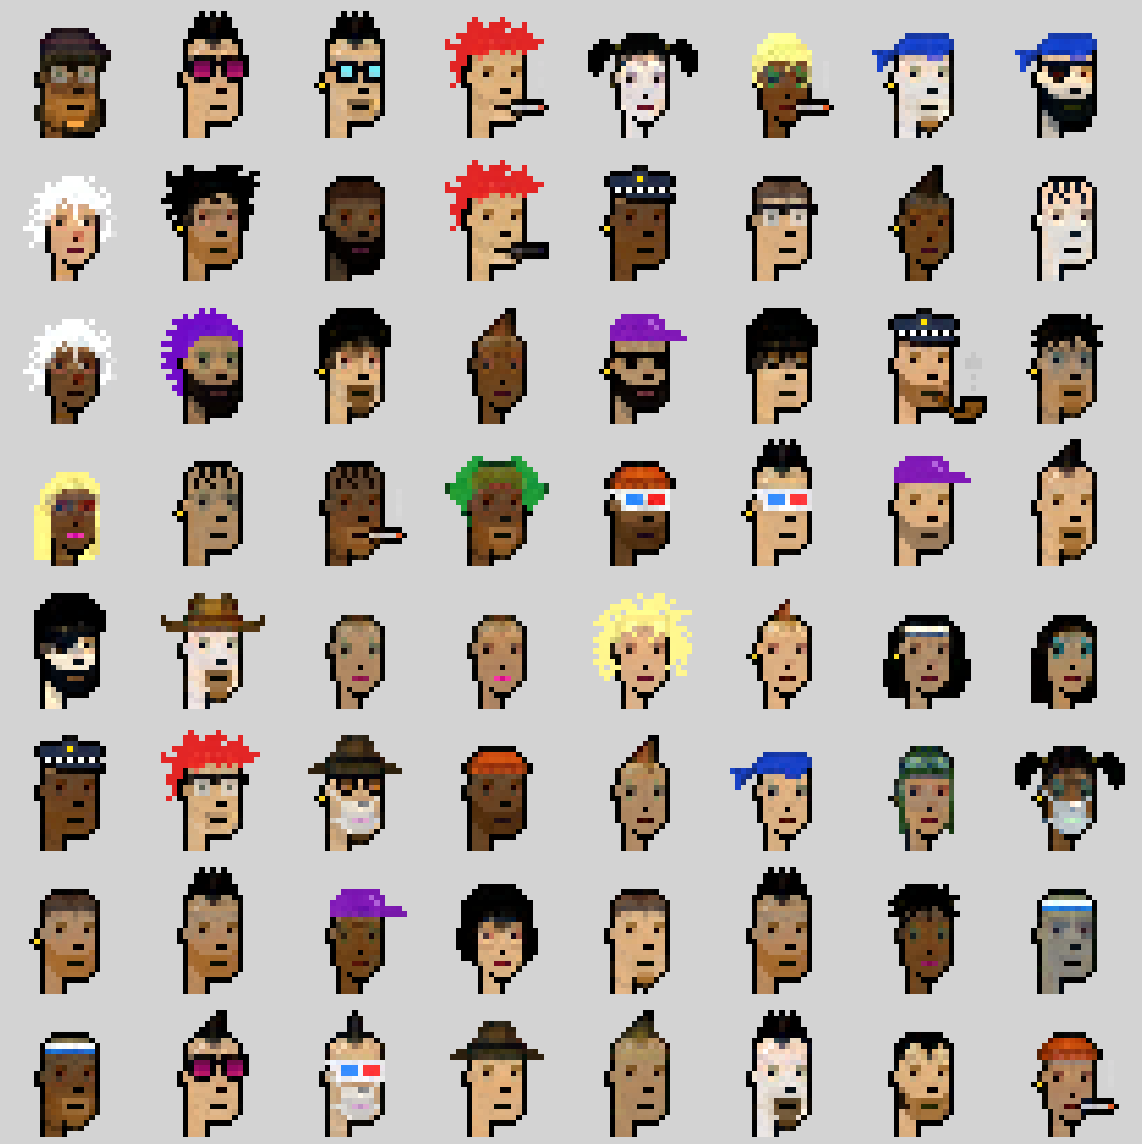

In [13]:
A = (W_RGB@H_RGB).reshape(24, 24, 3, 500)
faces_opacity_reshaped = faces_opacity.reshape(24,24,1,500)
A_new = np.clip(np.append(A, faces_opacity_reshaped, axis = 2),0,1 )
plotimgs(A_new)

Comment: ...

### 2e)

[]

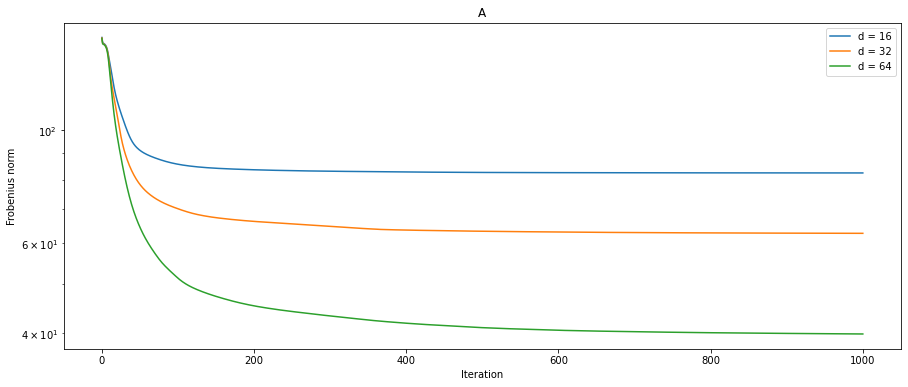

In [14]:
d_list = [16,32,64]
maxiter = 1000
iter = np.linspace(0, maxiter, maxiter)
fig, ax1 = plt.subplots(1, 1 , figsize=(15, 6))
for i in range(len(d_list)):
    d = d_list[i]
    W, H, norm_A = NMF(faces_reshaped, d, maxiter=maxiter)
    ax1.semilogy(iter, norm_A, label = f"d = {d}")
ax1.legend()
ax1.set_title('A')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Frobenius norm')
plt.plot()

Comment: ...

### 2f)

[]

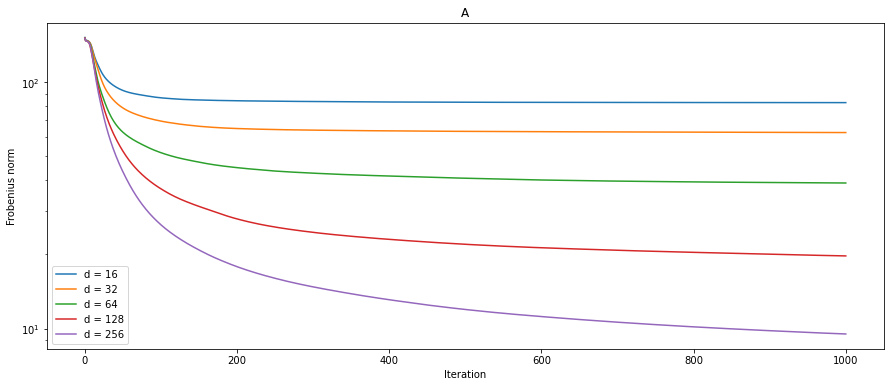

In [15]:
d_list = [16,32,64, 128, 256]
maxiter = 1000
iter = np.linspace(0, maxiter, maxiter)
fig, ax1 = plt.subplots(1, 1 , figsize=(15, 6))
for i in range(len(d_list)):
    d = d_list[i]
    W, H, norm_A = NMF(faces_reshaped, d, maxiter=maxiter)
    ax1.semilogy(iter, norm_A, label = f"d = {d}")
ax1.legend()
ax1.set_title('A')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Frobenius norm')
plt.plot()

Comment: ...

# Task 3

Working with the noisy images

In [ ]:
def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = faces_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces



In [ ]:
def NMF_noisy(V, V_noisless, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    Decompose matrix V, which in this case is an image with noise added to it, in matrices W and H, 
    with d as the number of columns in W and rows in H. For each iteration of W and H the frobenius
    norm between V_noisless and the matrix product W @ H is calculated, and passed into for_norm.
    input:
        V: (m,n) input array, image with added noise
        V_noisless: (m,n) input array, image without added noise
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
        fro_norm: (maxiter) array
    """

    if seed != 0:
        np.random.seed(seed)

    # Initialize W and H as matrices with random numbers between 0 and 1
    m , n = V.shape
    W = np.random.random(size = (m, d))
    H = np.random.random(size = (d, n))
    
    # Scale initial values
    W = W * np.sqrt(V.mean()/d)
    H = H * np.sqrt(V.mean()/d)

    fro_norm = np.zeros(maxiter)

    # Update W and H
    for i in range(maxiter):
        H = H * (W.T @ V) / (W.T @ W @ H + delta)
        W = W * (V @ H.T) / (W @ H @ H.T + delta)
        fro_norm[i] = np.linalg.norm(V_noisless - W@H, ord='fro')

    return W, H, fro_norm

42.194831993203664


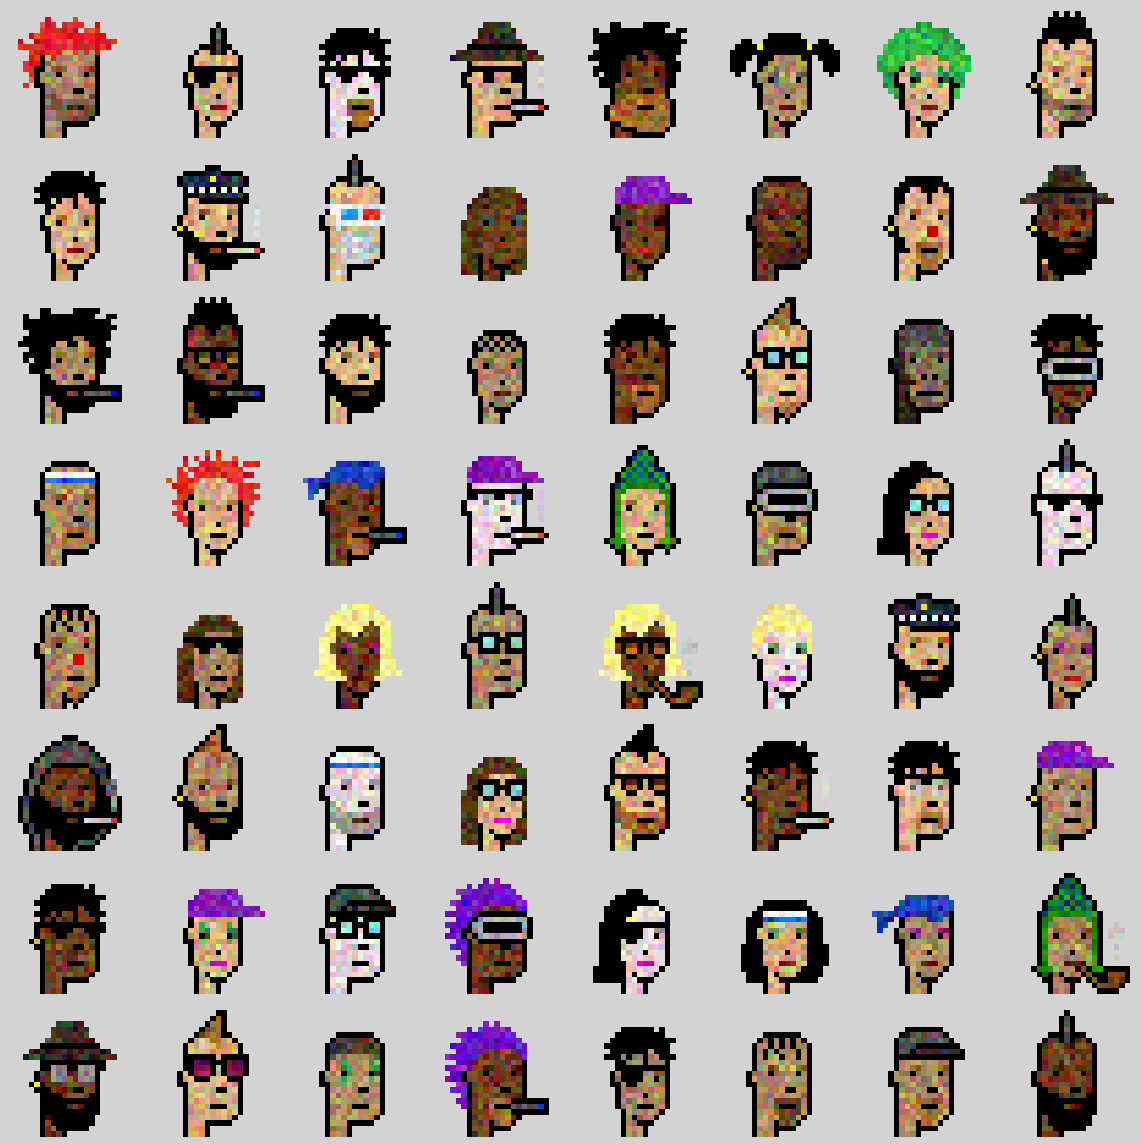

In [ ]:
noisy_faces = add_noise(faces_reshaped)

# Calculate the error of the noisy images
noise_residual = np.linalg.norm(noisy_faces - faces_reshaped)
print(noise_residual)

# For plotting noisy images we add the opacity
noisy_faces_with_opacity = np.zeros(faces.shape)
noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
noisy_faces_with_opacity[:,:,3,:] = faces_opacity
plotimgs(noisy_faces_with_opacity)

In [ ]:
d = 64
N = 500
noisy_faces_opacityless = noisy_faces_with_opacity[:,:,:3,:]
noisy_faces_reshaped = noisy_faces_opacityless.reshape(np.prod(noisy_faces_opacityless.shape)//N, N)
W_noisy, H_noisy, norm_noisy = NMF(noisy_faces_reshaped, d)

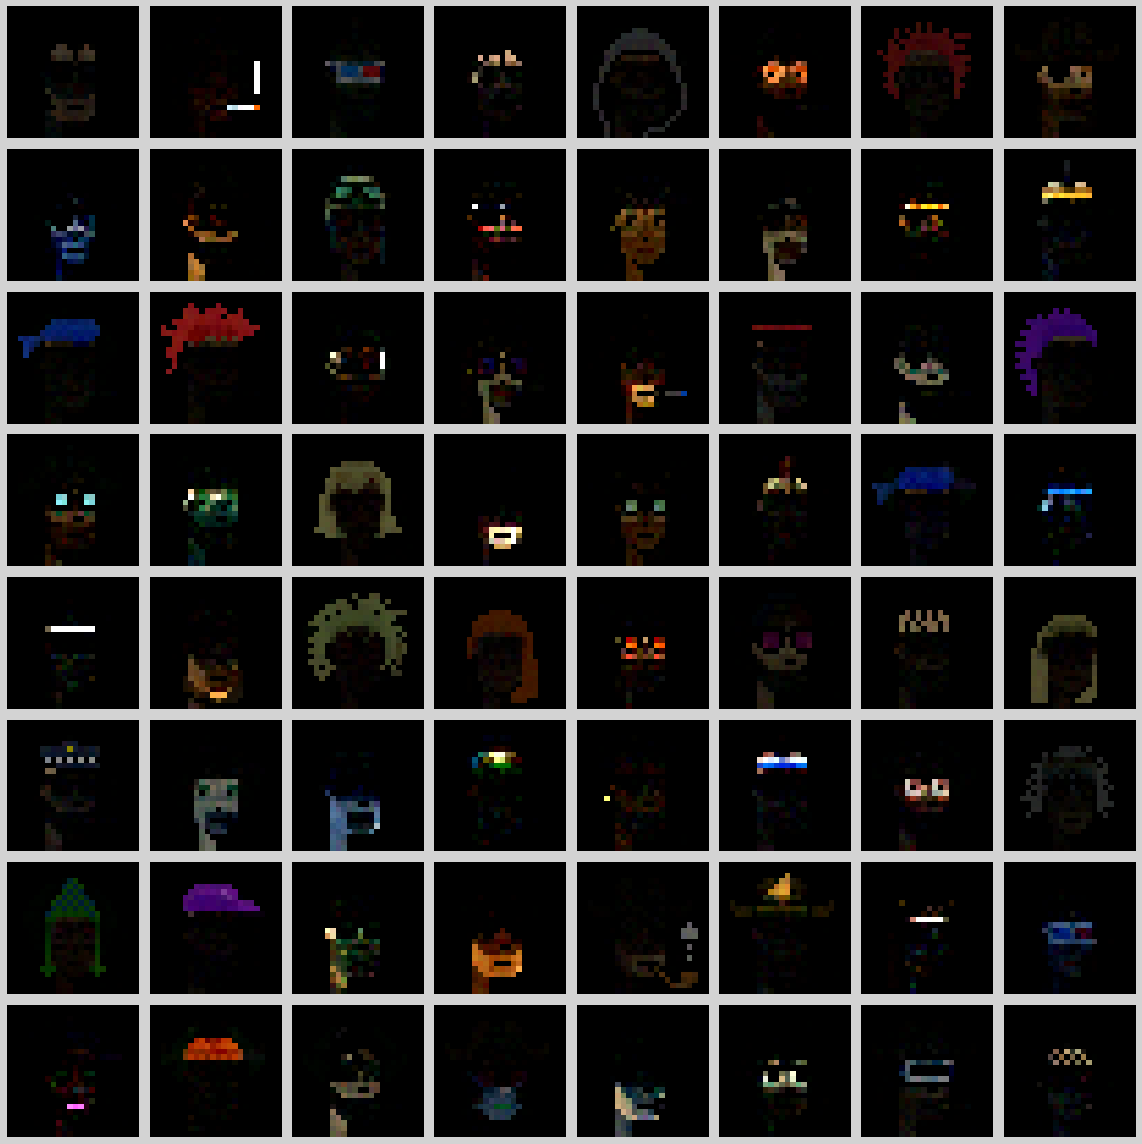

In [ ]:
W_noisy_reshaped = np.clip(np.reshape(W_noisy, (24,24,3,64)), 0, 1)
plotimgs(W_noisy_reshaped)

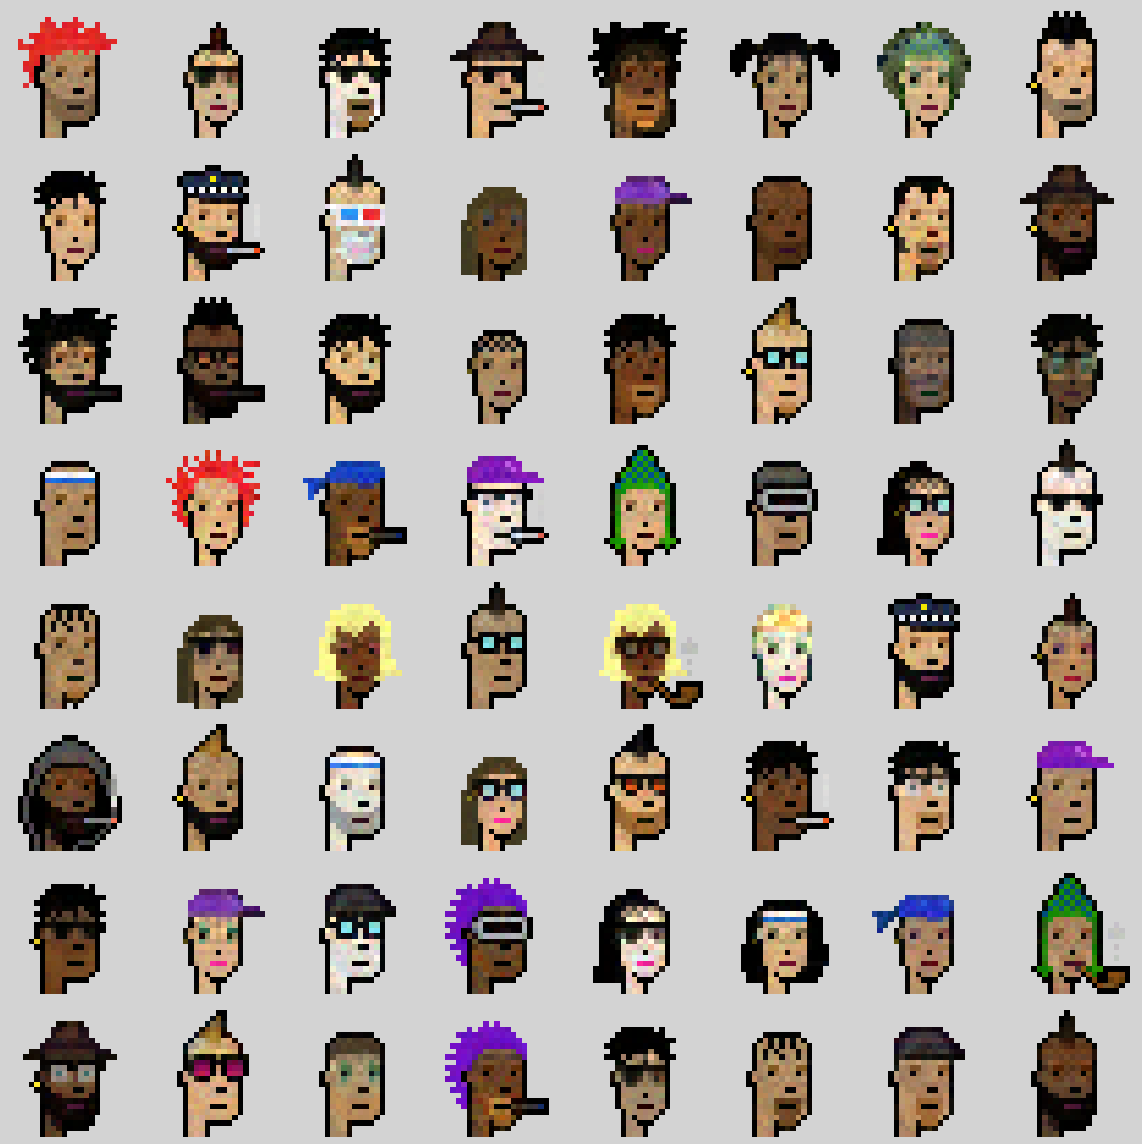

In [ ]:
A = (W_noisy@H_noisy).reshape(24, 24, 3, 500)
faces_noisy_NMF = np.copy(noisy_faces_with_opacity)
faces_noisy_NMF[:,:,:3,:] = A
faces_noisy_NMF[:,:,3,:] = noisy_faces_with_opacity[:,:,3,:]
faces_noisy_NMF = np.clip(faces_noisy_NMF, 0, 1)
plotimgs(faces_noisy_NMF)

[]

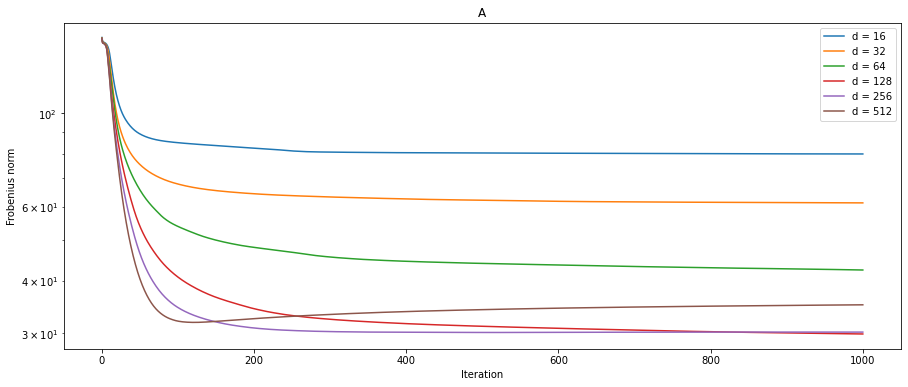

In [ ]:
noisy_faces_reshaped = noisy_faces_opacityless.reshape(np.prod(noisy_faces_opacityless.shape)//N, N)
d_list = [16,32,64, 128, 256, 512]
maxiter = 1000
iter = np.linspace(0, maxiter, maxiter)
fig, ax1 = plt.subplots(1, 1 , figsize=(15, 6))
for i in range(len(d_list)):
    d = d_list[i]
    W, H, norm_A = NMF_noisy(noisy_faces_reshaped, faces_reshaped, d, maxiter=maxiter)
    ax1.semilogy(iter, norm_A, label = f"d = {d}")
ax1.legend()
ax1.set_title('A')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Frobenius norm')
plt.plot()

## d)

Conclusion to our project